# Random Forest Model

Import relevant libraries and load the functions in [functions_book.py](functions_book.py)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import pandas as pd
%run -i 'functions_book.py'
%run -i 'data_names.py'

Read in data generated by [RF data preparation](RF_data_preparation.ipynb)

In [2]:
filtered_file = f'filtered{lidar_name}.csv'
whole_file = f'whole{lidar_name}.csv'

data = pd.read_csv(filtered_file, index_col = False)
print("Sample dimentions:".format(), data.shape)
print(data.head())
X = data[['Blue','Green','Red']]
y = data['Truth']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.96,random_state=1)

Sample dimentions: (8526559, 4)
   Blue  Green   Red  Truth
0 -9999  -9999 -9999      0
1 -9999  -9999 -9999      0
2 -9999  -9999 -9999      0
3 -9999  -9999 -9999      0
4 -9999  -9999 -9999      0


Make a model (currently arbitrary hyperparameters)

In [3]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=3)

In [4]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1000)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Mean Score: %.6f (SD: %.6f)' % (n_scores.mean(),n_scores.std()))

Mean Score: 0.925640 (SD: 0.001349)


Plot

In [5]:
# # the histogram of the scores
# n, bins, patches = plt.hist(n_scores, density=True, facecolor='blue', alpha=0.75)
# plt.text(0.91, 15, r'mean = ' + str(n_scores.mean().round(6)) + '  '+ 'SD = ' + str(n_scores.std().round(6)))
# plt.xlim(0.9, 1.01)
# plt.xlabel('Acuuracy')
# plt.ylabel('Probability (%)')
# plt.grid(True)
# plt.show()

In [6]:
# model.fit(X_train,y_train)
# result = permutation_importance(model, X_train, y_train, n_repeats=1000, random_state=42, n_jobs=2)
# print('Permutation importance - average:'.format(), X_train.columns)
# print([round(i, 6) for i in result.importances_mean])

# # displace feature importance
# fig, ax = plt.subplots(figsize=(6,5))
# ax.boxplot(result.importances.T)
# ax.set_title("Permutation Importances", fontsize = 16)
# ax.set_xticklabels(labels=X_train.columns, fontsize=14)
# plt.show()

Save model

In [7]:
# Make predictions on the test data
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)

# Compute the confusion matrix
np.savetxt('y_train.txt', y_train, fmt='%d')
np.savetxt('y_pred_train.txt', y_pred_train, fmt='%d')

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the confusion matrix
np.savetxt('y_test.txt', y_test, fmt='%d')
np.savetxt('y_pred.txt', y_pred, fmt='%d')

In [9]:
dir_model = "./random_forest_SCA_binary.joblib"
joblib.dump(model, dir_model)

['./random_forest_SCA_binary.joblib']

Reconstruct image from model output

In [10]:
data = pd.read_csv(whole_file, index_col = False)
print("Sample dimentions:".format(), data.shape)
print(data.head())
X = data[['Blue','Green','Red']]
y = data['Truth']

Sample dimentions: (2562780, 4)
   Blue  Green   Red  Truth
0 -9999  -9999 -9999      0
1 -9999  -9999 -9999      0
2 -9999  -9999 -9999      0
3 -9999  -9999 -9999      0
4 -9999  -9999 -9999      0


In [11]:
Y_pred = model.predict(X)
np.savetxt('y.txt', y, fmt='%d')
np.savetxt('Y_pred.txt', Y_pred, fmt='%d')

In [12]:
print(Y_pred.shape)
Y_map = Y_pred.reshape(1765, 1452) # from last cell of RF_data_preparation
print(Y_map)

(2562780,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


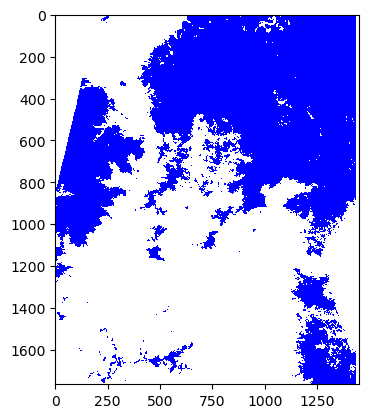

In [13]:
# Create a color map of fixed colors
cmap = plt.cm.colors.ListedColormap(['white', 'blue'])

# Plot the 2D array with the color map
plt.imshow(Y_map, cmap=cmap)